In [1]:
import os
import torch
from torch import nn
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("./Sleep_health_and_lifestyle_dataset.csv")
df_np = df.to_numpy()
# full_data = torch.from_numpy(df_np)

In [2]:
A = np.arange(1,10).reshape(3,3)

In [3]:
weight = .7
bias = .3

start = 0
end = 1
step = .02

X = torch.arange(start,end,step).unsqueeze(dim = 1)
Y = weight * X + bias

X[:10] , Y[:10] , len(X) , len(Y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

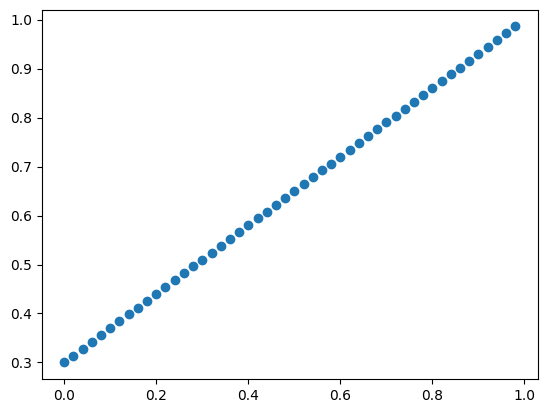

In [4]:
plt.figure()
plt.scatter(X,Y)

In [5]:
train_split = int(len(X)*0.8)

X_training_data ,Y_training_data = X[:train_split],Y[:train_split]
X_testing_data ,Y_testing_data = X[train_split:],Y[train_split:]

X_training_data,X_testing_data,Y_training_data,Y_testing_data

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
        

In [6]:
def plot_predictions(
        train_data = X_training_data,
        train_labels = Y_training_data,
        test_data = X_testing_data,
        test_labels = Y_testing_data,
        predictions = None
):
    # plot train data
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c="b",s=5, label= "Training data")
    
    # plot test data
    plt.scatter(test_data,test_labels,c="g",s=5, label= "Testing data")

    if predictions is not None : 
        plt.scatter(test_data, predictions,c = "r", s=4, label="Predictions")
    plt.legend(prop = {"size": 14})



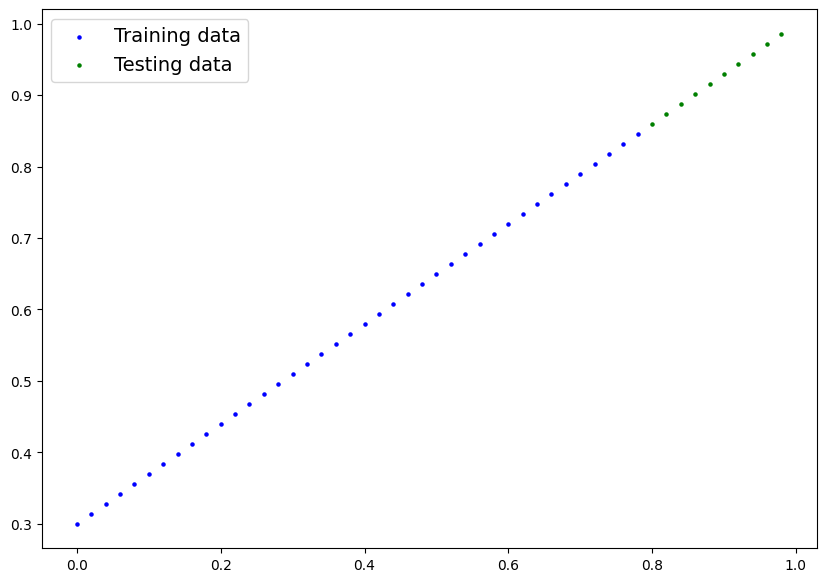

In [7]:
plot_predictions()

In [8]:
# linear regression model class
class linearRegressionModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.biases = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.biases
        


In [9]:
torch.manual_seed(42)
model_0 = linearRegressionModel()

params = [*model_0.parameters()]
params

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
X_testing_data,Y_testing_data

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

# making predicitons
### using the forward method on the nn.Module that we built we can make predictions on our data's outcome

In [11]:
with torch.inference_mode():
    Y_predictions = model_0(X_testing_data)
Y_predictions.numpy()

array([[0.3981617 ],
       [0.40489548],
       [0.41162932],
       [0.41836315],
       [0.42509693],
       [0.43183076],
       [0.43856454],
       [0.44529837],
       [0.45203215],
       [0.45876598]], dtype=float32)

### we compared our current predictions with our ideal ones via plotting

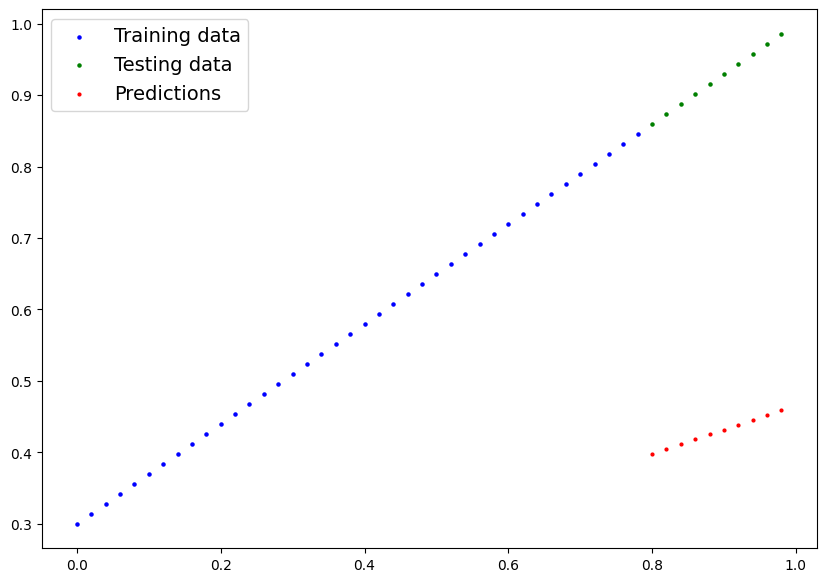

In [14]:
plot_predictions(predictions=Y_predictions)

## training a model 
- we want our randomly-set/unknown parameters to grow similar to our target/known parameters </br>(red matches green as close as possible...)

- we can evaluate how well/poorly our model is preforming with a "cost function" </br>(can be refered as "criterion" or loss "function") </br>https://pytorch.org/docs/stable/nn.html#loss-functions

- an optimizer is a function that takes in account the models lost and adjusts the models parameters according to its lost to improve the loss function </br>https://pytorch.org/docs/stable/optim.html#

- we need a training loop - a loop that teaches the model the correct data

- we need a testing loop - a loop that measures our models performence over the trainig loop

In [122]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer (stochastic grad descent)
optimizer = torch.optim.SGD(
    params= model_0.parameters(),
    lr = .01 # learning rate = the higher the lr , the more the optimizer changes the models parameters
)

choosing and setting an optimizer requires some experience with ml in general, no specific guidelines...

## building a training loop (and testing loop) with pytorch 

these are the following basics of a training loop:

1. loop throw the data 
2. using the forward method of our model to advance it
3. calculate the loss (compare the predictions with the labels of the data or so called the "truth")
4. optimizer zero grad 
5. loss backward - move back through the network to calculate the gradients of each of the parameters of out model eith respect to the loss </br>
(**backpropagation** - https://www.youtube.com/watch?v=Ilg3gGewQ5U&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=3)
6. optimizer step - use the optimizer to adjust out models parameters to try and improve the loss </br>
(**gradient descent** - https://www.youtube.com/watch?v=IHZwWFHWa-w&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=2)

Epoch : 0 | Loss : 0.31288138031959534 | Test Loss : 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('biases', tensor([0.1388]))])

Epoch : 10 | Loss : 0.1976713240146637 | Test Loss : 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('biases', tensor([0.2388]))])

Epoch : 20 | Loss : 0.08908725529909134 | Test Loss : 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('biases', tensor([0.3333]))])

Epoch : 30 | Loss : 0.053148526698350906 | Test Loss : 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('biases', tensor([0.3768]))])

Epoch : 40 | Loss : 0.04543796554207802 | Test Loss : 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('biases', tensor([0.3868]))])

Epoch : 50 | Loss : 0.04167863354086876 | Test Loss : 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('biases', tensor([0.3843]))])

Epoch : 60 | Loss : 0.03818932920694351 | Test Loss : 0.08886633068323135
OrderedDict([('weights', ten

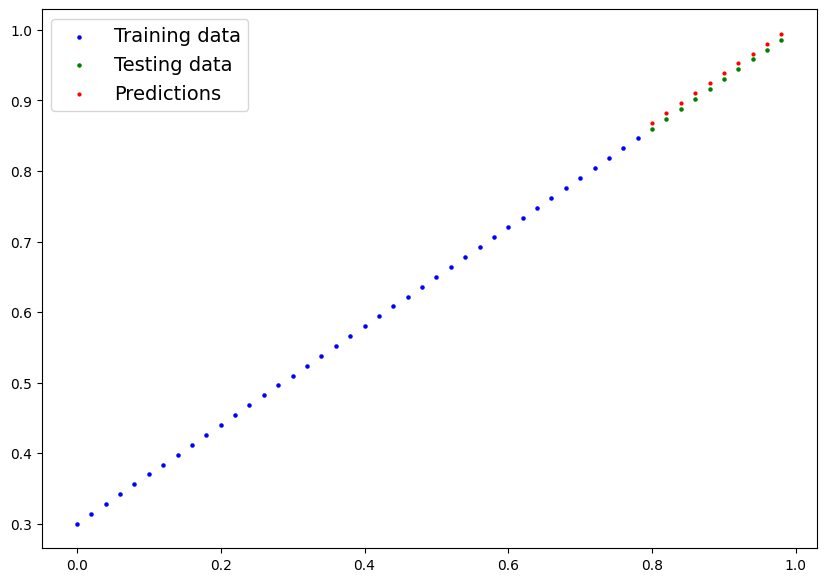

In [123]:
with torch.inference_mode():
    list(model_0.parameters())

# Track differet values
epoch_count = []
loss_values = []
test_loss_values = []

# an epoch is one loop through the data...
epochs = 200
# setting variables for evaluating the training process
_weight,_bias = model_0.parameters()
error = 0.01

#? 0. loop through the data :
for epoch in range(epochs): # break after given number of epochs
# while _bias - bias >= error and weight- _weight >= error: # break after reciving sufficient error
    # epochs +=1                  #

    model_0.train() # set model to train mode - sets all parameters that require gradients to require gradients    
    #? 1. forward pass - moving forward within the dataset
    Y_predictions = model_0(X_training_data)

    #? 2. calculate the loss 
    loss = loss_fn(Y_predictions,Y_training_data)

    #? 3. optimizer zero grad 
    optimizer.zero_grad()
    
    #? 4. preform backpropagation on the loss with respect to the parameters of the model 
    loss.backward()

    #? 5. step the optimizer (preform gradient descent)
    optimizer.step() # by default how th eoptimizer changes will accumulate through the loop... we have to zero them above in step 3 for the next iteration of the loop

    ### testing
    model_0.eval() # turns off different setting s in the model not needed for evaluation/testing (dropout and batchNorm layers...)
    with torch.inference_mode(): # turns off gradient tracking and "stops" the learning with more processes behind the scenes
        # 1. do the forward pass
        test_predictions = model_0(X_testing_data)

        # 2. calculate the loss
        test_loss = loss_fn(test_predictions,Y_testing_data)
    # print whats happening
    if epoch%10 == 0 : 
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)

        print(f"Epoch : {epoch} | Loss : {loss} | Test Loss : {test_loss}")
        print(model_0.state_dict())
        print()



# predictions after training the model 
print(epochs)

# after we finish all epochs we visualize the the models predictions with a plot to see its progress
with torch.inference_mode():
    Y_predictions = model_0(X_testing_data)
Y_predictions.numpy()
plot_predictions(predictions=Y_predictions)

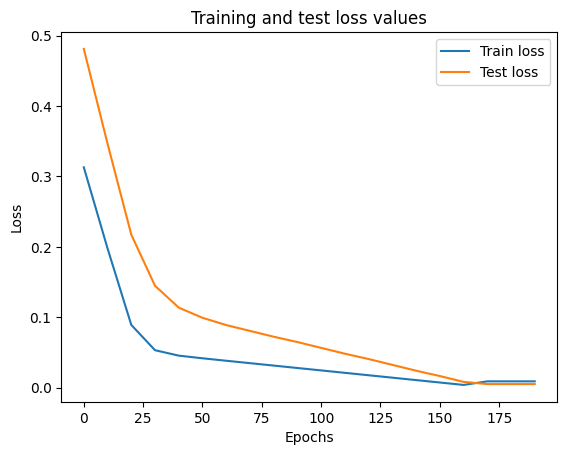

In [124]:
# epoch_count,loss_values,test_loss_values
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label = "Train loss")
plt.plot(epoch_count,test_loss_values,label = "Test loss")
plt.title("Training and test loss values")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## saving and loading a model in pytorch
there are three main methods for saving and loading models in pytorch:
- **torch.save()** - allows you to save a Pytorch object in Python's pickle format 
- **torch.load()** - allows you to load a saved Pytorch object  <br>
- **torch.nn.Module.load_state_dict()** - this allows to load a model's saved state dictionary (all the relevent weights and biases...)<br>
about pythons pickle format : <br>https://docs.python.org/3/library/pickle.html<br>
pytorch save&load model extra : <br>https://pytorch.org/tutorials/beginner/basics/saveloadrun_tutorial.html

In [126]:
# saving our pytoch model
from pathlib import Path

# 1.create models dir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2.create a model save path 
MODEL_NAME = "pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH/ MODEL_NAME

MODEL_SAVE_PATH

# 3.save the model state dict 
print(f"saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

saving model to : models\pytorch_workflow_model.pth


## loading a the models state params
we will use the torch.load() method to retrive our state params that we earned after the previous training <br>
this way we won't need to run the entire notebook for accurate predictions from our model

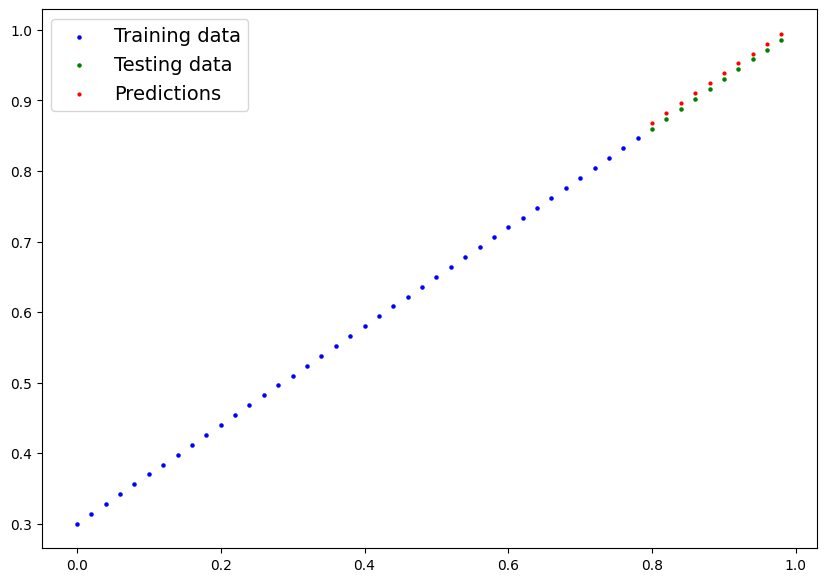

In [18]:
# create a new instance of the prebuilt model
loaded_model_0 = linearRegressionModel()
# load the post-training params that we saved to the model instance that we just created
loaded_model_0.load_state_dict(torch.load(f="./models/pytorch_workflow_model.pth")) 

# we use the same code from before to predict and plot the outputs...
with torch.inference_mode():
    Y_predictions = loaded_model_0(X_testing_data)
Y_predictions.numpy()
plot_predictions(predictions=Y_predictions)

In [ ]:
# ! use this code in future progects if possible to make calculations more effecient
# !nvidia-smi
device = "cuda" if  torch.cuda.is_available() else "cpu"
print(f'using device : {device}')

***

## let's put everything together...

In [1]:
import torch
import numpy
from matplotlib import pyplot as plt

## creating and spliting the data

In [2]:
# creating the data using linear regression formula
weight = .7
bias = .3

# create range values for creating the data
start = 0
end = 1.0
step = .02

# create X and Y (feature and label)
X = torch.arange(start=start,end=end,step=step).unsqueeze(dim=1) #!  <- prevents technical errors
Y = weight * X + bias

X[:10],Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
split_idx = int(.8*len(X))

X_train , Y_train = X[:split_idx],Y[:split_idx]
X_test , Y_test = X[split_idx:],Y[split_idx:]

len(X_train),len(Y_train),len(X_test),len(Y_test)

(40, 40, 10, 10)

In [4]:
def plot_predictions(
        train_features = X_train,
        train_labels = Y_train,
        test_features = X_test,
        test_labels = Y_test,
        predictions = None,
):
        plt.figure(figsize=(10,7))
        
        # plotting the training data
        plt.scatter(train_features,train_labels,c="b",s=4,label="trainig")
        
        # plotting the test data
        plt.scatter(test_features,test_labels,c="green",s=4,label="testing")

        if predictions is not None : 
                plt.scatter(test_features,predictions,c="red",s=4,label="predictions")
        plt.legend(prop={"size":14})

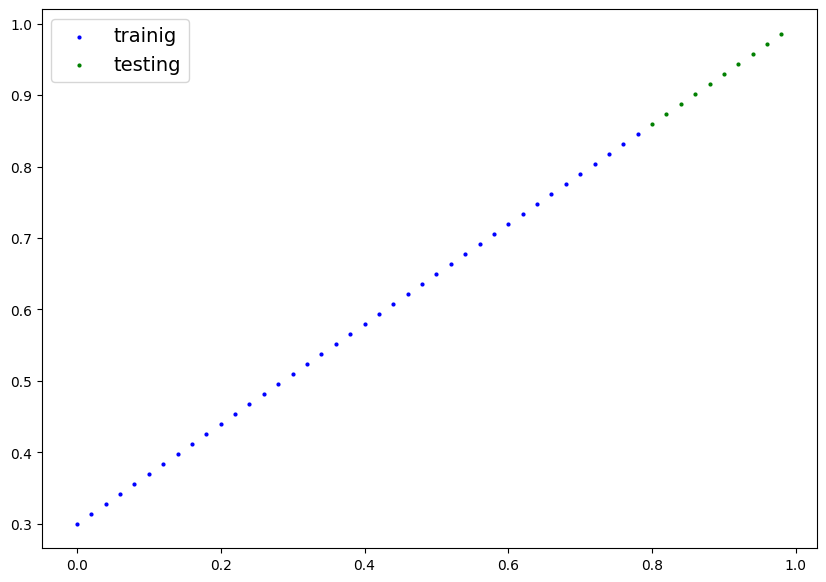

In [50]:
plot_predictions()

## building a pytorch linear model

In [5]:
class linearRegressionModel_V2(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()
        # instead of initializing our weight and params we use the inheritance from nn.Module
        self.linear_layer = torch.nn.Linear(in_features=1,out_features=1) #? <- this does the exact same process as before but already made beforehand
    def forward(self,x:torch.Tensor)-> torch.Tensor:
        return self.linear_layer(x)

# set the manual seed for reproducability
model_1 = linearRegressionModel_V2()
model_1, model_1.state_dict()

(linearRegressionModel_V2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.8983]])),
              ('linear_layer.bias', tensor([-0.9119]))]))

In [52]:
# set the model to use the target device
next(model_1.parameters()).device
device = "cuda" if torch.cuda.is_available() else "cpu"

In [53]:
# will move the data to the gpu if such exists...
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

## Training
for training we need :
- loss function
- optimizer
- training loop
- testing loop

In [54]:
# Loss function
loss_fn = torch.nn.L1Loss()

# optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=.01)


In [55]:
# training loop
torch.manual_seed(42)

# ! make sure that you store the data in the same decive as the model
X_train = X_train.to(device)
Y_train = Y_train.to(device)
X_test = X_test.to(device)
Y_test = Y_test.to(device)

epochs = 200


for epoch in range(epochs):
    # 1. forward pass
    Y_predictions = model_1(X_train)

    # 2. calculate the loss 
    loss = loss_fn(Y_predictions,Y_train)

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4.perform backpropagation
    loss.backward()

    # 5.optimizer step
    optimizer.step()

    #* Testing
    # model_1.eval()

    with torch.inference_mode() :
        test_predictions = model_1(X_test)

        test_loss = loss_fn(test_predictions,Y_test)
    if epoch%10 == 0 :
        print(f"epoch : {epoch} | Loss : {loss} | Test loss : {test_loss}")


epoch : 0 | Loss : 0.5551779866218567 | Test loss : 0.5739762187004089
epoch : 10 | Loss : 0.4399680495262146 | Test loss : 0.4392663538455963
epoch : 20 | Loss : 0.3247582018375397 | Test loss : 0.30455657839775085
epoch : 30 | Loss : 0.20954827964305878 | Test loss : 0.16984674334526062
epoch : 40 | Loss : 0.09433844685554504 | Test loss : 0.03513689711689949
epoch : 50 | Loss : 0.023886386305093765 | Test loss : 0.04784906655550003
epoch : 60 | Loss : 0.0199567973613739 | Test loss : 0.04580312222242355
epoch : 70 | Loss : 0.016517987474799156 | Test loss : 0.0375305712223053
epoch : 80 | Loss : 0.013089170679450035 | Test loss : 0.029944902285933495
epoch : 90 | Loss : 0.009653178043663502 | Test loss : 0.02167237363755703
epoch : 100 | Loss : 0.006215679459273815 | Test loss : 0.014086711220443249
epoch : 110 | Loss : 0.002787243574857712 | Test loss : 0.005814164876937866
epoch : 120 | Loss : 0.0012645035749301314 | Test loss : 0.013801807537674904
epoch : 130 | Loss : 0.00126450

0.7 0.3


(Parameter containing:
 tensor([[0.6968]], requires_grad=True),
 Parameter containing:
 tensor([0.3025], requires_grad=True))

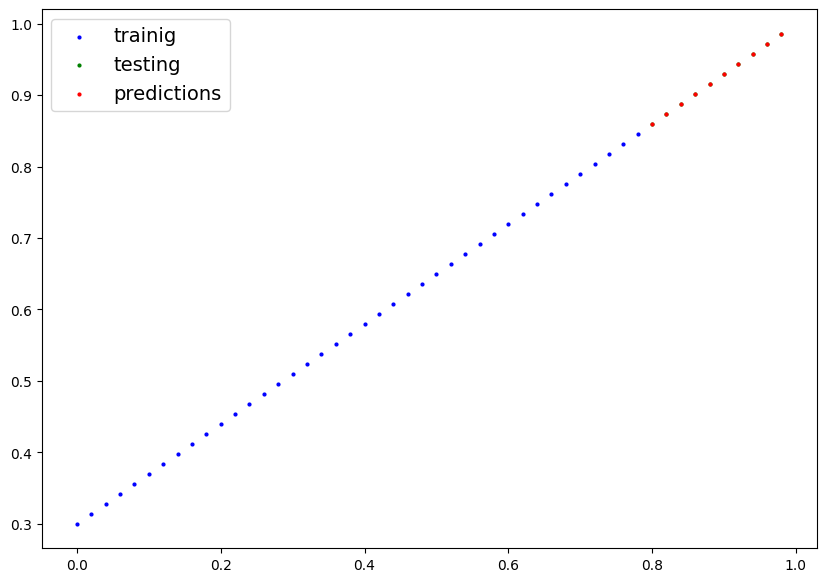

In [58]:
plot_predictions(predictions=test_predictions)
print(weight,bias)
_weight,_bias = model_1.parameters()
_weight,_bias

In [65]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_NAME = MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = "pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

print(f"saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)

saving model to : models\pytorch_workflow_model_1.pth


In [9]:
loaded_model_1 = linearRegressionModel_V2()
loaded_model_1.load_state_dict(torch.load("./models/pytorch_workflow_model_1.pth"))
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

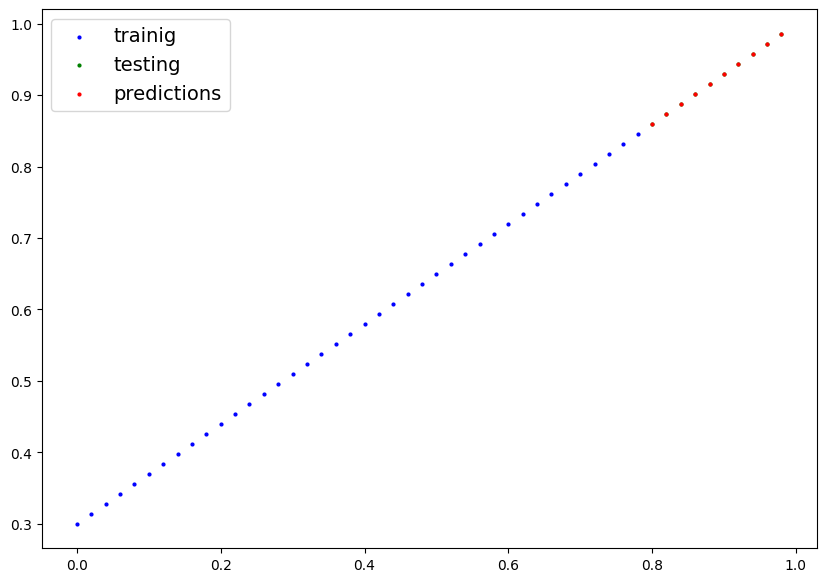

In [10]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_predictions = loaded_model_1(X_test)
plot_predictions(predictions=loaded_model_1_predictions)